In [1]:
# multidimensional arrays
import numpy as np

# inline plots
import matplotlib.pyplot as plt
%matplotlib inline

# nicer figures
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Waiting for the bus
Before starting this second notebook, have a look at problem *1.3 Waiting for the bus* from list 1. The take-home message was that **exponential** waiting times between events imply **Poisson** number of events in a given time interval. What are the events? In our exercise they were bus arrivals, but they could be anything.

We will start by generating exponential random numbers. In the [previous session](1.1-Generating-Random-Numbers.ipynb) we learnt howe to generate random numbers with a given distribution via **inverse sampling**. Today, however, we will use functions from `numpy.random`.

### Question
Find a `numpy.random` function that generates numbers drawn from the exponential distribution. You might simply google "numpy random exponential" or browse [numpy's website]().

The function is `numpy.random.exponential`. Because we imported `numpy` as `np`, you can call it simply with `np.random.exponential`.

## Function's documentation

Using the `?` command, you will get a quick view of a functions documentation. 

In [2]:
np.random.exponential?

Docstring:
exponential(scale=1.0, size=None)

Draw samples from an exponential distribution.

Its probability density function is

.. math:: f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta}),

for ``x > 0`` and 0 elsewhere. :math:`\beta` is the scale parameter,
which is the inverse of the rate parameter :math:`\lambda = 1/\beta`.
The rate parameter is an alternative, widely used parameterization
of the exponential distribution [3]_.

The exponential distribution is a continuous analogue of the
geometric distribution.  It describes many common situations, such as
the size of raindrops measured over many rainstorms [1]_, or the time
between page requests to Wikipedia [2]_.

Parameters
----------
scale : float or array_like of floats
    The scale parameter, :math:`\beta = 1/\lambda`.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value 


Well-documented python functions, such as most found in numpy, follow a standardized format. The most important parts of a function's documentation are:

The *first line*: gives a briev description of what the function does. It is followed by a more lengthy and detailed paragraph, but the first line should be enough to undersand what a function does.

The *Parameters* section, which tells you what are the arguments or parameters of the function. It tells you what `type` they should be: a string, a float, and integer, etc. Notice that in python, parameters can be almost anything: you can pass a function to another function, you can pass an array, or a whole class, or any kind of python object.

The *Returns* section is also very important, because it tells you what the function returns. Sometimes it is obvious, sometimes not, specially with functions that compute and return more than one thing.

### Exercise

Using numpy's functions, write a function called `get_waiting_times` of your own that has as input arguments an integer `size` and a float `lam`, and returns `size` samples from an exponential distribution with $\lambda=$`lam`. The probability density function of an exponential random variable is:
$$
f(x) = \lambda e^{-\lambda x}
$$
Make sure you check what do the parameters of numpy's random exponential function mean!

In [3]:
def get_waiting_times(size, lam):
    scale = 1 / lam
    w_times = np.random.exponential(size=size, scale=scale)
    return w_times

## From exponential to Poisson
The rest of the exercise consists in verifying computationally that exponential waiting times between events imply Poisson number of events in a given time period, as we already showed analytically during last lecture. So, in case you didn't find the proof convincing, now you get a chance to see for yourself!

### Exercise
Write a function that computes the event times. Your function should call the `get_waiting_times` function, and should have the same parameters. In case it is not clear, the event times $t_i$ are computed from the waiting times $w_i$ as
$$
t_i = \sum_{k=1}^{i} w_k
$$

In [4]:
def get_event_times(size, lam):
    waiting_times = get_waiting_times(size=size, lam=lam)
    # we simply do a cumulative sum of the waiting times
    # e_i = sum_{k}
    event_times = np.cumsum(waiting_times)
    return event_times

Now we need to count the number of events in a given time interval. There is a practical problem, since we don't know how many events to generate.

### Exercise
Device a strategy to make sure you generate enough events. That is, given a time period $T$ and the rate $\lambda$ of the exponential, how many events $N(T, \lambda)$ should you generate to make sure that $t_N > T$ ? 

*Answer:* Since we know the distribution of number of events in a time period $T$ is a Poisson, we can choose $N$ such that the probability of getting more than $N$ events is very small. How small? Well, it depends on two things: (i) how sure you want to be that your function will not fail and (ii) how many times will you use the function.

## Assertions
The `assert` statement is used to verify conditions that we expect to be `True`. For instance:
```python
assert 4 > 1 #True
assert "a" in ["a", "b", "c"] #True
assert 1 >= 2 #AssertionError
```
If the condition after `assert` is `False`, then an error is raised. But otherwise, nothing happens. Think of `assert` as "make sure": we don't want to do anything if the condition is `True`, we just want to make sure it is not `False`. A typical use case is to make sure that the passed arguments have some properties. For instance:

```python
def polar_to_cartesian(r, phi):
    """
    Transform polar to cartesian coordinates.
    """
    # let's make sure r is positive
    assert r >= 0
  
    # then compute the coordinates
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    
    return x, y
```

Notice that, without the assertion, the function would work for negative radius without complaining, and that is something we want to avoid.

### Exercise
Write a function that counts the events in a given time period. The input parameters should be `time_period` and `lam`. Your function should call the `get_event_times` function. The output should be an integer, the number of events in the time period.

Add an `assert` statement to make sure that we have generate enough events.

In [5]:
from scipy.stats import poisson

def count_events(time_period, lam):
    # make sure everything is fine
    assert time_period > 0
    assert lam > 0
    
    # estimate number of events necessary
    num_events = int( poisson(mu=time_period * lam).isf(1e-6))
    
    # generate event times
    event_times = get_event_times(size=num_events, lam=lam)
        
    # make sure that the last event is outside the time period
    assert event_times[-1] > time_period
    
    # see which events are inside the time period
    event_inside = event_times < time_period
    
    # count how many are inside
    num_inside = np.sum(event_inside)
    
    return num_inside

## Exercise
How would you make sure your function works correctly? Notice that working correctly means two things: 

1. Returning the correct result when used properly
2. Raising an error (thus not returning any result) when called incorrectly

So, you need to make sure that your function works for a few cases that you know the solution of, and also that if you call your function with unphysical values (negative time, imaginary rate, ...) you don't get a result, but instead an error is raised. **Hint** use `assert` statements!

In [8]:
def test_with_numpy(time_period, lam, num_samples):
    # generate our results
    sample = [
        count_events(time_period=time_period, lam=lam)
        for _ in range(num_samples)
    ]
    # compare with real poisson sample
    sample_ground_truth = np.random.poisson(lam=lam * time_period, size=num_samples)
    return sample, sample_ground_truth

/Users/fran/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


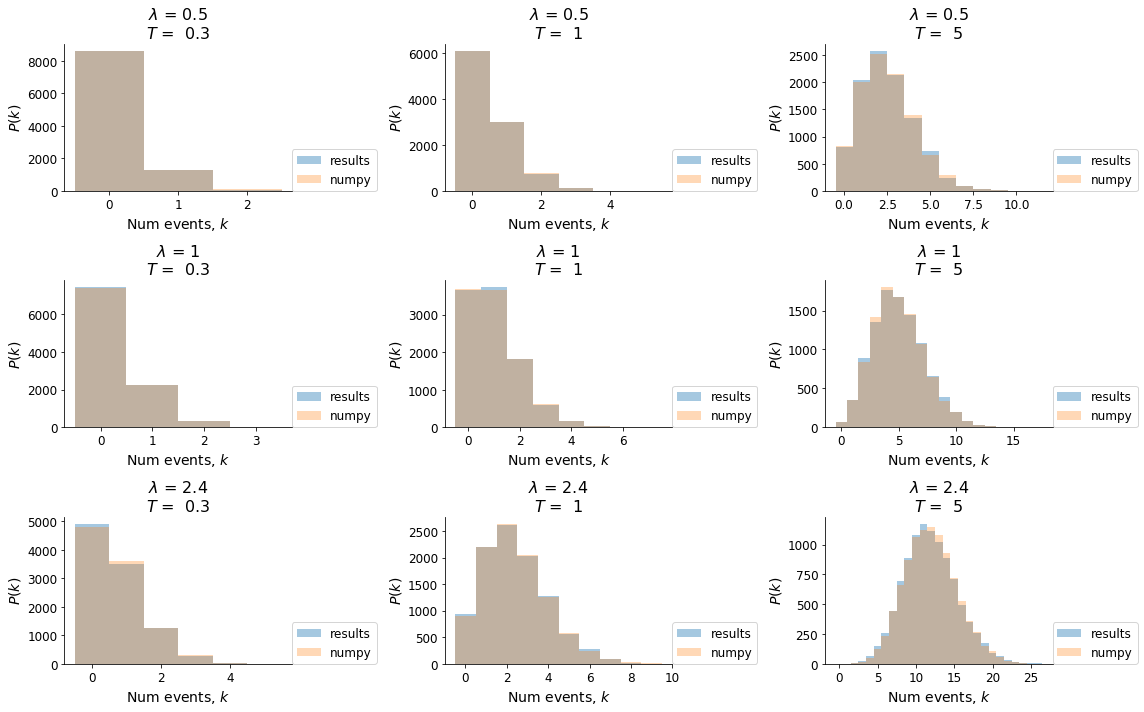

In [18]:
lams = [0.5, 1, 2.4]
time_periods = [0.3, 1, 5]

fig, axx = plt.subplots(3, 3, figsize=(16, 10), tight_layout=True)
axx = axx.reshape(-1)
i = 0
for lam in lams:
    for time_period in time_periods:
        
        ax = axx[i]
        i = i+1
        
        sample, sample_true = test_with_numpy(time_period=time_period, lam=lam, num_samples=10000)
        M = max(max(sample), max(sample_true))
        ax.set_title(f"$\lambda$ = {lam}\n$T$ =  {time_period}")
        ax.hist(
            sample,
            bins=np.arange(-0.5, M + 0.5),
            alpha=0.4,
            label="results"
        );
        ax.hist(
            sample_true,
            bins=np.arange(-0.5, M + 0.5),
            alpha=0.3,
            label="numpy"
        );
        ax.set_xlabel(r"Num events, $k$")
        ax.set_ylabel(f"$P(k)$")
        ax.legend(loc=(1, 0))